In [6]:
import wandb
run = wandb.init()
runs = [59, 56, 60, 57, 58, 61]
artifact = run.use_artifact('doseok/ActiveRL/reward_data:v61', type='evaluation')
artifact_dir = artifact.download()
ARTIFACT_TYPE = "scatter"

wandb:   1 of 1 files downloaded.  


In [7]:
import os
import pickle
file_name = list(os.listdir(artifact_dir))[0]
file_name = os.path.join(artifact_dir, file_name)
print(file_name)
with open(file_name, 'rb') as f:
    data = pickle.load(f)
rews, bad_idxs = data

./artifacts/reward_data:v61/1_117_active_vs_activeplr.pkl


In [11]:
rews.keys()

dict_keys(['median_activeplr', 'median_activerl'])

set()
median_activerl:            rew         x         y  idx
0   -0.388746  0.103472  0.260794    0
1   -0.300583 -0.049980  0.143678    1
2   -0.337123 -0.128204  0.192089    2
3   -0.357794 -0.090003  0.130694    3
4   -0.359165  0.009176  0.024713    4
..        ...       ...       ...  ...
115 -0.344243 -0.030980 -0.117930  115
116 -0.316434 -0.135319 -0.200766  116
117 -0.334609 -0.092765 -0.286366  117
118 -0.320170 -0.384961 -0.188659  118
119 -0.309459 -0.039971 -0.011125  119

[120 rows x 4 columns]
median_activeplr:            rew         x         y  idx
0   -0.394193  0.103472  0.260794    0
1   -0.305745 -0.049980  0.143678    1
2   -0.343141 -0.128204  0.192089    2
3   -0.363810 -0.090003  0.130694    3
4   -0.364229  0.009176  0.024713    4
..        ...       ...       ...  ...
115 -0.350565 -0.030980 -0.117930  115
116 -0.321689 -0.135319 -0.200766  116
117 -0.340646 -0.092765 -0.286366  117
118 -0.326092 -0.384961 -0.188659  118
119 -0.315429 -0.039971 -0.011125  1

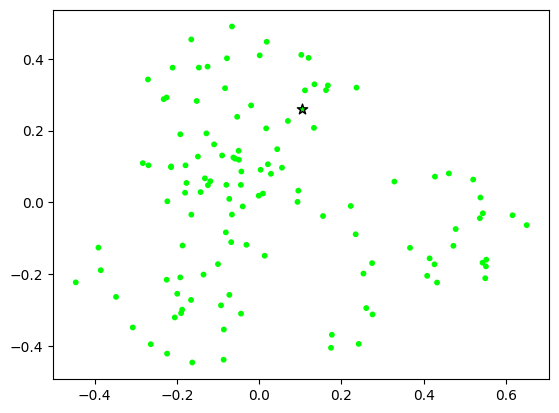

In [12]:
import time
import writeup.utils as utils
from importlib import reload
reload(utils)
if ARTIFACT_TYPE == "scatter":
    utils.plot_scatter(time.perf_counter(), rews, bad_idxs, "median_activerl")
else:
    utils.plot_bars(time.perf_counter(), rews, bad_idxs, "results", only_avg=True)